<a href="https://colab.research.google.com/github/cdavis94-school/s23-CS167-Notes/blob/main/Project1_Davis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#1 Starter Code: 
Your first step is to decide which dataset you would like to work with for this project. 

For this project, you will get to choose what dataset you use. The ones we've used in class (other than Iris/Titanic as they're pretty small) are all fair game (wine quality, breast cancer, spotify). 

Here are some other possibilities--Kaggle has many many more. It might be a good idea to double check with me before grabbing a dataset that's not listed here:
- 🥑 [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)
- 🎟️ [Admission to University](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university)
- 🏎️ [Speed Dating](https://www.kaggle.com/datasets/whenamancodes/speed-dating)
- 🎓 [World University Ranking](https://www.kaggle.com/datasets/whenamancodes/world-university-ranking-2022-2023)
- 📸 [Top Instagram Influencers](https://www.kaggle.com/datasets/whenamancodes/top-200-influencers-crushing-on-instagram)
- 🌦️ [Weather Prediction](https://www.kaggle.com/datasets/thedevastator/weather-prediction)
- 🤑 [Student Monthly Expenses](https://www.kaggle.com/datasets/shariful07/nice-work-thanks-for-share)
- 🍺 [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
- 🏫 [College Score Card](https://www.kaggle.com/datasets/thedevastator/u-s-department-of-education-college-scorecard-da)
- 🎮 [IMDB Video Games](https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games)
- 🎵 [Spotify Recommendation](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

# Self-Evaluation:

| **Description/Writing** | **I think I deserve** |
|-------------------------|-----------------------|
| 1: Problem              | 2/2                   |
| 2: Data Prep            | 1/2                   |
| 3: Research             | 8/10                  |
| 4: Analysis             | /10                   |
| 5: Bumps in the Road.   | 1/1                   |
| Total                   | /25                   |

# 1. Problem:
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

Attempting to predict the chances of admittance to a masters program. 

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

*your answer here*

In [1]:
import pandas as pd
from google.colab import drive
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
raw_data = pd.read_csv('/content/drive/MyDrive/datasets/proj1_data.csv')
print(raw_data.any().isna())
print("----------------------------")
raw_data.head()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool
----------------------------


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
target = 'Chance of Admit '
predictors = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
train_data, test_data, train_sln, test_sln = train_test_split(raw_data[predictors], raw_data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()

scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

# 3. Research

Put your code and your experiments here.

For full credit, your experiments should include the following models:
- __k Nearest Neighbors__
- __weighted k Nearest Neighbors__
- __decision tree__
- __random forest__ 

You need to demonstrate the performance of these models on both __normalized__ and __non-normalized__ data. 

For each of the above models, you need to include a __graph of at least 1 tuned parameter__. 


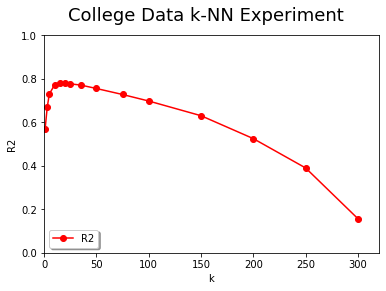

0.7797533118970087

In [4]:
#KNN non-nomalized
k_vals = [1,3,5,10,15,20,25,35,50,75,100,150,200,250,300]
kNN_accuracies = []

for k in k_vals:
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_data, train_sln)
    preds = knn.predict(test_data)
    current_accuracy = metrics.r2_score(test_sln, preds)
    kNN_accuracies.append(current_accuracy)

plt.suptitle('College Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('R2')
plt.plot(k_vals,kNN_accuracies,'ro-',label='R2')
plt.legend(loc='lower left', shadow=True)
plt.axis([0, 320,0,1])

plt.show()

knn = neighbors.KNeighborsRegressor(n_neighbors = 12)
knn.fit(train_data, train_sln)
preds = knn.predict(test_data)
knn_r2 = metrics.r2_score(test_sln, preds)
knn_r2


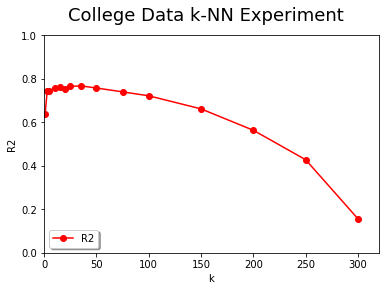

0.7508509978567461

In [5]:
#knn normalized
kNN_accuracies = []

for k in k_vals:
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_data_normalized, train_sln)
    preds = knn.predict(test_data_normalized)
    current_accuracy = metrics.r2_score(test_sln, preds)
    kNN_accuracies.append(current_accuracy)

plt.suptitle('College Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('R2')
plt.plot(k_vals,kNN_accuracies,'ro-',label='R2')
plt.legend(loc='lower left', shadow=True)
plt.axis([0, 320,0,1])

plt.show()

knn = neighbors.KNeighborsRegressor(n_neighbors = 12)
knn.fit(train_data_normalized, train_sln)
preds = knn.predict(test_data_normalized)
knn_r2 = metrics.r2_score(test_sln, preds)
knn_r2


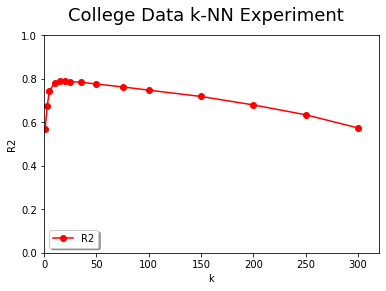

0.7873689111015518

In [6]:
kNN_accuracies = []

for k in k_vals:
    wknn = neighbors.KNeighborsRegressor(n_neighbors = k, weights = 'distance')
    wknn.fit(train_data, train_sln)
    preds = wknn.predict(test_data)
    current_accuracy = metrics.r2_score(test_sln, preds)
    kNN_accuracies.append(current_accuracy)

plt.suptitle('College Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('R2')
plt.plot(k_vals,kNN_accuracies,'ro-',label='R2')
plt.legend(loc='lower left', shadow=True)
plt.axis([0, 320,0,1])

plt.show()

wknn = neighbors.KNeighborsRegressor(n_neighbors = 12, weights = 'distance')
wknn.fit(train_data, train_sln)
preds = wknn.predict(test_data)
knn_r2 = metrics.r2_score(test_sln, preds)
knn_r2

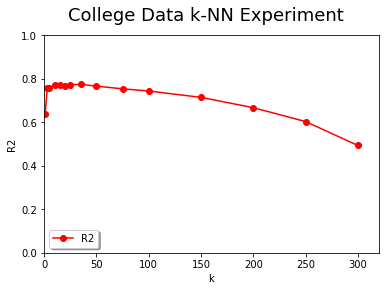

0.7638844317077148

In [7]:
kNN_accuracies = []

for k in k_vals:
    wknn = neighbors.KNeighborsRegressor(n_neighbors = k, weights = 'distance')
    wknn.fit(train_data_normalized, train_sln)
    preds = wknn.predict(test_data_normalized)
    current_accuracy = metrics.r2_score(test_sln, preds)
    kNN_accuracies.append(current_accuracy)

plt.suptitle('College Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('R2')
plt.plot(k_vals,kNN_accuracies,'ro-',label='R2')
plt.legend(loc='lower left', shadow=True)
plt.axis([0, 320,0,1])

plt.show()

wknn = neighbors.KNeighborsRegressor(n_neighbors = 12, weights = 'distance')
wknn.fit(train_data_normalized, train_sln)
preds = wknn.predict(test_data_normalized)
knn_r2 = metrics.r2_score(test_sln, preds)
knn_r2

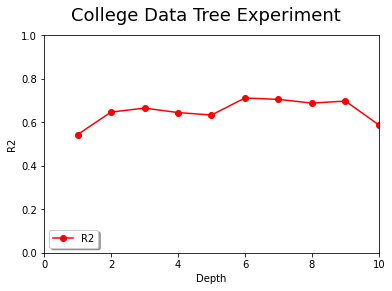

0.663149461244216

In [9]:
tree_depth = [1,2,3,4,5,6,7,8,9,10]
tree_accuracies = []

for k in tree_depth:
    dt = tree.DecisionTreeRegressor(max_depth = k)
    dt.fit(train_data, train_sln)
    preds = dt.predict(test_data)
    current_accuracy = metrics.r2_score(test_sln, preds)
    tree_accuracies.append(current_accuracy)

plt.suptitle('College Data Tree Experiment',fontsize=18)
plt.xlabel('Depth')
plt.ylabel('R2')
plt.plot(tree_depth,tree_accuracies,'ro-',label='R2')
plt.legend(loc='lower left', shadow=True)
plt.axis([0, 10,0,1])

plt.show()

dt = tree.DecisionTreeRegressor(max_depth = 6)
dt.fit(train_data, train_sln)
preds = dt.predict(test_data)
tree_r2 = metrics.r2_score(test_sln, preds)
tree_r2

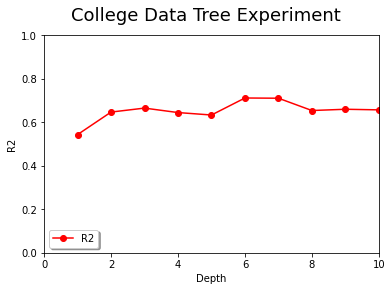

0.6718724022382905

In [10]:
tree_accuracies = []
holder = 0
best_knn = 0



for k in tree_depth:
    dt = tree.DecisionTreeRegressor(max_depth = k)
    dt.fit(train_data_normalized, train_sln)
    preds = dt.predict(test_data_normalized)
    current_accuracy = metrics.r2_score(test_sln, preds)
    tree_accuracies.append(current_accuracy)


plt.suptitle('College Data Tree Experiment',fontsize=18)
plt.xlabel('Depth')
plt.ylabel('R2')
plt.plot(tree_depth,tree_accuracies,'ro-',label='R2')
plt.legend(loc='lower left', shadow=True)
plt.axis([0, 10,0,1])

plt.show()

dt = tree.DecisionTreeRegressor(max_depth = 6)
dt.fit(train_data_normalized, train_sln)
preds = dt.predict(test_data_normalized)
tree_r2 = metrics.r2_score(test_sln, preds)
tree_r2

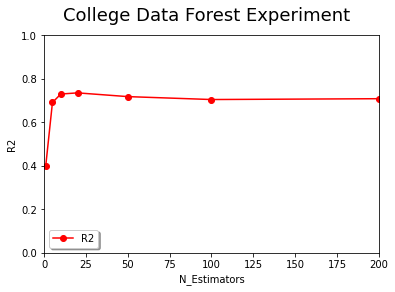

0.7030589650366807

In [14]:
estimators = [1,5,10,20,50,100,200]
tree_accuracies = []
holder = 0
best_knn = 0



for k in estimators:
    df = RandomForestRegressor(n_estimators = k)
    df.fit(train_data, train_sln)
    preds = df.predict(test_data)
    current_accuracy = metrics.r2_score(test_sln, preds)
    tree_accuracies.append(current_accuracy)

plt.suptitle('College Data Forest Experiment',fontsize=18)
plt.xlabel('N_Estimators')
plt.ylabel('R2')
plt.plot(estimators,tree_accuracies,'ro-',label='R2')
plt.legend(loc='lower left', shadow=True)
plt.axis([0, 200,0,1])

plt.show()

df = RandomForestRegressor(n_estimators = 100)
df.fit(train_data, train_sln)
preds = df.predict(test_data)
metrics.mean_squared_error(test_sln, preds)
tree_r2 = metrics.r2_score(test_sln, preds)
tree_r2

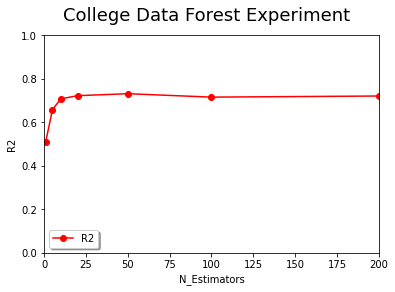

0.7192436324234444

In [15]:
tree_accuracies = []
holder = 0
best_knn = 0

for k in estimators:
    df = RandomForestRegressor(n_estimators = k)
    df.fit(train_data_normalized, train_sln)
    preds = df.predict(test_data_normalized)
    current_accuracy = metrics.r2_score(test_sln, preds)
    tree_accuracies.append(current_accuracy)

plt.suptitle('College Data Forest Experiment',fontsize=18)
plt.xlabel('N_Estimators')
plt.ylabel('R2')
plt.plot(estimators,tree_accuracies,'ro-',label='R2')
plt.legend(loc='lower left', shadow=True)
plt.axis([0, 200,0,1])

plt.show()

df = RandomForestRegressor(n_estimators = 100)
df.fit(train_data_normalized, train_sln)
preds = df.predict(test_data_normalized)
metrics.mean_squared_error(test_sln, preds)
tree_r2 = metrics.r2_score(test_sln, preds)
tree_r2

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

This chart might help organize your results:

| **Model**     | **Non-Normalized** | **Normalized** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           |        .78         |      .75       |        # of K       |
| w-kNN         |        .78         |      .76       |        # of K       |
| decision tree |        .66         |      .67       |        Depth        |
| random forest |        .70         |      .71       |        N_Estimators |

With this dataset K-nearest neighbors is the clear best performing. I decided to use R2 as my method of accuracy measurement because it's on a 0-1 scale no matter the outcome so it's easy to compare amongst different methods. The interesting part to me however was that there is no measurable difference between kNN and weighted kNN. I believe there is such a small difference between non normalized and normalized data because the input variables are so close to each other in size already that normalizing didn't alter their proportions too much. What is interesting to me is in both kNN models the normalized data did worse consistantly no matter the alterations I made to the model. This tells me that a variable with higher inputs has a higher weight to the decision so the non normalization helps the outcome accuracy. I am pleased with the overall outcome of the model and would feel comfortable using it for real world predictions. The application for me would be to test different exam scores on goal graduate schools to see where you want to be to get accepted.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

The first challenge I ran into is the data, it isn't too complex and didn't need any cleaning for the program so I wasn't able to demonstrate those abilities. A issue I ran into that I could not fix is a couple column names having a space in the name, in trying to rename the column using df.rename() an error occured that I could not fix. The key theme in my issues for the rest of the project was the outcome not being what I expected. I expected that the normalized data would outperform the non-nomalized data every time, in tweaking the model atributes I could not get the nomalized data to outperform. 